<a href="https://colab.research.google.com/github/zia207/Survival_Analysis_R/blob/main/Colab_Notebook/02_07_03_02_survival_analysis_weibull_model_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![All-test](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 3.2 The Weibull Model for Survival Analysis


This tutorial demonstrates how to fit and interpret a Weibull model for survival analysis in R. The Weibull model is a flexible parametric model that allows for increasing, decreasing, or constant hazard rates, making it more versatile than the exponential model.


## Overview


The Weibull model is a versatile parametric model in survival analysis, capable of modeling increasing, decreasing, or constant hazard rates. Below, I derive the key mathematical functions for the Weibull distribution—**probability density function (PDF)**, **survival function**, **hazard function**, and **cumulative hazard function**—starting from first principles. I’ll keep the derivation clear and concise, focusing on the standard two-parameter Weibull distribution commonly used in survival analysis.


### Parameters

The Weibull distribution is characterized by two parameters:

- $\lambda > 0$: **Scale parameter**, related to the characteristic life or spread of the distribution.
- $(p > 0$: **Shape parameter**, which determines the behavior of the hazard function:
  - $p > 1$: Increasing hazard (e.g., aging systems).
  - $p < 1$: Decreasing hazard (e.g., early failures).
  - $p = 1$: Constant hazard (reduces to the exponential model).

The random variable $T$ represents the survival time ($T\geq 0$).


### Probability Density Function (PDF)


The PDF, $f(t)$, describes the probability density of the event occurring at time $t$.

**Derivation**:

The Weibull PDF is defined as:

$$
f(t) = p \lambda^p t^{p-1} e^{-(\lambda t)^p}, \quad t \geq 0, \quad \lambda, p > 0
$$

- **Origin**: The Weibull distribution generalizes the exponential distribution. For the exponential ($p = 1$), the PDF is $f(t) = \lambda e^{-\lambda t}$. The Weibull introduces the shape parameter $p$, which modifies the time scale via $t^{p-1}$ and the exponential term via $(\lambda t)^p$.

- **Normalization**: To ensure $f(t)$ is a valid PDF, it must integrate to 1 over $[0, \infty)$:

$$
  \int_0^\infty f(t) \, dt = \int_0^\infty p \lambda^p t^{p-1} e^{-(\lambda t)^p} \, dt
$$
  Substitute $u = (\lambda t)^p$, so $t = u^{1/p} / \lambda$, $dt = \frac{1}{p} \lambda^{-1} u^{1/p - 1} \, du$:

$$
  \int_0^\infty p \lambda^p \left(\frac{u^{1/p}}{\lambda}\right)^{p-1} e^{-u} \cdot \frac{1}{p} \lambda^{-1} u^{1/p - 1} \, du
$$
  Simplify:
$$
  = \int_0^\infty p \lambda^p \cdot \lambda^{1-p} u^{(p-1)/p} \cdot \frac{1}{p} \lambda^{-1} u^{1/p - 1} e^{-u} \, du
  = \int_0^\infty \lambda^{p - (p-1) - 1} u^{(p-1)/p + 1/p - 1} e^{-u} \, du
  = \int_0^\infty e^{-u} \, du = 1
$$
  This confirms the PDF is properly normalized.


### Survival Function


The survival function, $S(t) = P(T > t)$, is the probability of surviving past time $t$. It is derived from the cumulative distribution function (CDF), $F(t) = P(T \leq t)$.

**Derivation**:

The CDF is the integral of the PDF:

$$
F(t) = \int_0^t f(u) \, du = \int_0^t p \lambda^p u^{p-1} e^{-(\lambda u)^p} \, du
$$
Using the same substitution as above, $v = (\lambda u)^p$, $u = v^{1/p} / \lambda$, $du = \frac{1}{p} \lambda^{-1} v^{1/p - 1} \, dv$:

$$
F(t) = \int_0^{(\lambda t)^p} p \lambda^p \left(\frac{v^{1/p}}{\lambda}\right)^{p-1} e^{-v} \cdot \frac{1}{p} \lambda^{-1} v^{1/p - 1} \, dv
= \int_0^{(\lambda t)^p} e^{-v} \, dv = \left[ -e^{-v} \right]_0^{(\lambda t)^p} = 1 - e^{-(\lambda t)^p}
$$
Thus, the survival function is:
$$
S(t) = 1 - F(t) = e^{-(\lambda t)^p}
$$
- **Properties**:

  - $S(0) = e^0 = 1$ (100% survival at $t = 0$).
  
  - As $t \to \infty$, $S(t) \to 0$.
  
  - When $p = 1$, $S(t) = e^{-\lambda t}$, recovering the exponential survival function.


### Hazard Function


The hazard function, $h(t)$, is the instantaneous rate of the event occurring at time $t$, given survival up to $t$. It is defined as:

$$
h(t) = \frac{f(t)}{S(t)}
$$

**Derivation**:
Using the PDF and survival function:

$$
h(t) = \frac{p \lambda^p t^{p-1} e^{-(\lambda t)^p}}{e^{-(\lambda t)^p}} = p \lambda^p t^{p-1}
$$
Simplify:

$$
h(t) = p \lambda^p t^{p-1} = \lambda p (\lambda t)^{p-1}
$$
- **Properties**:

  - The hazard depends on $t^{p-1}$:
  
    - If $p > 1$, $h(t)$ increases with time (e.g., wear-out failures).
    
    - If $p < 1$, $h(t)$ decreases (e.g., early failures).
    
    - If $p = 1$, $h(t) = \lambda$, constant (exponential model).
    
  - The term $\lambda^p$ scales the hazard, and $p$ shapes its time dependency.


###  Cumulative Hazard Function


The cumulative hazard function, $H(t)$, is the integral of the hazard function over time:

$$
H(t) = \int_0^t h(u) \, du
$$

**Derivation**:

$$
h(u) = p \lambda^p u^{p-1}
$$
Integrate:

$$
H(t) = \int_0^t p \lambda^p u^{p-1} \, du = \lambda^p \left[ u^p \right]_0^t = \lambda^p t^p = (\lambda t)^p
$$

- **Relationship to Survival**: The survival function can be expressed as:

$$
S(t) = e^{-H(t)} = e^{-(\lambda t)^p}
$$
  This confirms consistency across the functions.


### Summary of Weibull Functions


- **PDF**: $f(t) = p \lambda^p t^{p-1} e^{-(\lambda t)^p}$
- **Survival Function**: $S(t) = e^{-(\lambda t)^p}$
- **Hazard Function**: $h(t) = p \lambda^p t^{p-1} = \lambda p (\lambda t)^{p-1}$
- **Cumulative Hazard**: $H(t) = (\lambda t)^p$


### Additional Notes


- **Mean and Variance**:

  - Mean: $E[T] = \lambda^{-1} \Gamma(1 + 1/p)$, where $\Gamma$ is the gamma function.
  
  - Variance: $\text{Var}(T) = \lambda^{-2} \left[ \Gamma(1 + 2/p) - \Gamma(1 + 1/p)^2 \right]$.
  
- **Special Case**: When $p = 1$, the Weibull reduces to the exponential model ($f(t) = \lambda e^{-\lambda t}$, $S(t) = e^{-\lambda t}$, $h(t) = \lambda$.

- **Practical Use**: In R’s `survreg` (from the `survival` package), the Weibull model is fit with `dist = "weibull"`. The scale parameter is $\lambda = \exp(-\text{Intercept}/\text{scale})$, and the shape parameter is $p = 1/\text{scale}$.

- **Flexibility**: The Weibull’s ability to model non-constant hazards makes it widely applicable in reliability engineering, medical survival analysis, and more.

These derivations show how the Weibull functions are interconnected, with the shape parameter \(p\) providing flexibility over the exponential model.



## Setup R in Python Runtype - Install {rpy2}
{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp312-cp312-linux_x86_64.whl size=316569 sha256=dc10967c72376ad3c9c496d43ce0b295c10b3df33b7fa791248ad95715d810c2
  Stored in directory: /root/.cache/pip/wheels/00/26/d5/d5e8c0b039915e785be870270e4a9263e5058168a03513d8cc
Successfully built rpy2


## Mount Google Drive

In [2]:
## Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Implementation in R


 We'll use the `survival` package to fit the model, interpret results, make predictions, and visualize outputs. We'll use the `lung` dataset from the `survival` package for demonstration.


## Install Required R Packages


Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:


In [3]:
%%R
packages <-c(
		 'tidyverse',
		 'survival',
		 'flexsurv',
		 'survminer',
		 'ggsurvfit',
		 'tidycmprsk',
		 'ggfortify',
		 'timereg',
		 'cmprsk',
		 'condSURV',
		 'riskRegression'
		 )


# Install missing packages

In [ ]:
%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')
devtools::install_github("ItziarI/WeDiBaDis", lib='drive/My Drive/R/')

# Verify installation

In [4]:
%%R
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:


  method        from 
  nobs.multinom broom



     tidyverse       survival       flexsurv      survminer      ggsurvfit 
          TRUE           TRUE           TRUE           TRUE           TRUE 
    tidycmprsk      ggfortify        timereg         cmprsk       condSURV 
          TRUE           TRUE           TRUE           TRUE           TRUE 
riskRegression 
          TRUE 


### Load Packages

In [5]:
%%R
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))

In [6]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])

Successfully loaded packages:
 [1] "package:riskRegression" "package:condSURV"       "package:cmprsk"        
 [4] "package:timereg"        "package:ggfortify"      "package:tidycmprsk"    
 [7] "package:ggsurvfit"      "package:survminer"      "package:ggpubr"        
[10] "package:flexsurv"       "package:survival"       "package:lubridate"     
[13] "package:forcats"        "package:stringr"        "package:dplyr"         
[16] "package:purrr"          "package:readr"          "package:tidyr"         
[19] "package:tibble"         "package:ggplot2"        "package:tidyverse"     
[22] "package:tools"          "package:stats"          "package:graphics"      
[25] "package:grDevices"      "package:utils"          "package:datasets"      
[28] "package:methods"        "package:base"          


### Data


We'll use the built-in `lung` dataset from the `survival` package for demonstration. This dataset contains survival times for patients with advanced lung cancer. Key variables:

   - `time`: Survival time in days.
   - `status`: Censoring indicator (1 = censored, 2 = dead; we'll recode it to 0/1 for standard use).
   - Covariates like `age`, `sex`, etc.



In [7]:
%%R
data(lung)
head(lung)  # View the first few rows

  inst time status age sex ph.ecog ph.karno pat.karno meal.cal wt.loss
1    3  306      2  74   1       1       90       100     1175      NA
2    3  455      2  68   1       0       90        90     1225      15
3    3 1010      1  56   1       0       90        90       NA      15
4    5  210      2  57   1       1       90        60     1150      11
5    1  883      2  60   1       0      100        90       NA       0
6   12 1022      1  74   1       1       50        80      513       0


### Preparing the Data


Create a survival object using the `Surv()` function to handle time and censoring.


In [8]:
%%R
# Recode status: 1 = censored (0), 2 = dead (1)
lung$status <- lung$status - 1

# Create survival object
surv_object <- Surv(time = lung$time, event = lung$status)

### Fitting the Weibull Model


The Weibull model is fit using `survreg()` with `dist = "weibull"`. The Weibull model can be parameterized as an Accelerated Failure Time (AFT) model, where the survival time follows a Weibull distribution. The model estimates a scale parameter ($\lambda$) and a shape parameter ($p$), where:

- $p > 1$: Increasing hazard rate.
- $p < 1$: Decreasing hazard rate.
- $p = 1$: Constant hazard (equivalent to exponential).


### Without Covariates (Intercept-Only Model)


Fit a basic Weibull model to estimate baseline survival.


In [9]:
%%R
# Fit the Weibull model
weibull_model <- survreg(surv_object ~ 1, data = lung, dist = "weibull")
# View summary
summary(weibull_model)


Call:
survreg(formula = surv_object ~ 1, data = lung, dist = "weibull")
              Value Std. Error      z      p
(Intercept)  6.0349     0.0591 102.05 <2e-16
Log(scale)  -0.2752     0.0624  -4.41  1e-05

Scale= 0.759 

Weibull distribution
Loglik(model)= -1153.9   Loglik(intercept only)= -1153.9
Number of Newton-Raphson Iterations: 6 
n= 228 




**Output interpretation**:

- **Intercept**: Log of the scale parameter ($log(\lambda)$).

- **Log(scale)**: Related to the shape parameter ($p = 1 / \text{scale}$). If $\log(\text{scale}) < 0$, then $p > 1$, indicating an increasing hazard.

- **Hazard function**: $h(t) = \lambda p (\lambda t)^{p-1}$, where $\lambda = \exp(-\text{Intercept}/\text{scale})$.

- **Survival function**: $S(t) = \exp(-(\lambda t)^p)$.


### With Covariates


Include covariates like `age` and `sex` (1 = male, 2 = female) to model their effect on survival time.


In [10]:
%%R
# Fit Weibull model with covariates
weibull_model_cov <- survreg(Surv(time, status) ~ age + sex, data = lung, dist = "weibull")
# View summary
summary(weibull_model_cov)


Call:
survreg(formula = Surv(time, status) ~ age + sex, data = lung, 
    dist = "weibull")
               Value Std. Error     z       p
(Intercept)  6.27485    0.48137 13.04 < 2e-16
age         -0.01226    0.00696 -1.76  0.0781
sex          0.38209    0.12748  3.00  0.0027
Log(scale)  -0.28230    0.06188 -4.56 5.1e-06

Scale= 0.754 

Weibull distribution
Loglik(model)= -1147.1   Loglik(intercept only)= -1153.9
	Chisq= 13.59 on 2 degrees of freedom, p= 0.0011 
Number of Newton-Raphson Iterations: 5 
n= 228 




**Interpretation**:

- Coefficients are on the log-time scale (AFT model). A positive coefficient increases survival time (decreases hazard).

- For example, a positive coefficient for `sex` suggests females have longer survival times.

- Hazard ratio for a covariate: $\exp(-\text{coefficient} / \text{scale})$.

- The shape parameter ($p = 1 / \text{scale}$) determines the hazard's behavior over time.

To test model significance:


In [11]:
%%R
anova(weibull_model_cov)

Analysis of Deviance Table

 distribution with  link

Response: Surv(time, status)

Scale estimated

Terms added sequentially (first to last)
     Df Deviance Resid. Df  -2*LL Pr(>Chi)   
NULL                   226 2307.7            
age   1   3.9147       225 2303.8 0.047866 * 
sex   1   9.6788       224 2294.1 0.001864 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### Interpreting the Results


- **Shape Parameter**: Extract $p = 1 / \exp(\log(\text{scale}))$.


In [12]:
%%R
p <- 1 / exp(weibull_model_cov$scale)
p  # Shape parameter

[1] 0.4704569



  If \(p > 1\), the hazard increases over time; if \(p < 1\), it decreases.

- **Scale Parameter**: \(\lambda = \exp(-\text{Intercept} / \text{scale})\).


In [ ]:
%%R
lambda <- exp(-coef(weibull_model)[1] / weibull_model_cov$scale)
lambda


- **Goodness-of-Fit**: Compare AIC to other models (e.g., exponential).


In [13]:
%%R
exp_model_cov <- survreg(Surv(time, status) ~ age + sex, data = lung, dist = "exponential")
AIC(weibull_model_cov, exp_model_cov)

                  df      AIC
weibull_model_cov  4 2302.109
exp_model_cov      3 2318.198



  Lower AIC indicates a better fit. Weibull often outperforms exponential due to its flexibility.

- **Confidence Intervals**:


In [14]:
%%R
confint(weibull_model_cov)

                  2.5 %      97.5 %
(Intercept)  5.33139117 7.218314949
age         -0.02589342 0.001379369
sex          0.13223512 0.631935156


### Making Predictions

### Predicted Survival Times


Predict median survival times for individuals.


In [15]:
%%R
# Predict median survival times for the fitted model
predict(weibull_model_cov, type = "response")

# For new data (e.g., a 60-year-old male)
new_data <- data.frame(age = 60, sex = 1)
predict(weibull_model_cov, newdata = new_data, type = "response")

      1 
372.977 


### Survival Probabilities


Calculate survival probabilities at specific times.


In [16]:
%%R
# Survival probability at t=500 days for the new data
t <- 500
linear_predictor <- predict(weibull_model_cov, newdata = new_data, type = "lp")
p <- 1 / weibull_model_cov$scale
surv_prob <- exp(-(t / exp(linear_predictor))^p)
surv_prob

        1 
0.2287682 


### Plotting and Visualization


Visualize survival curves and check model fit.


#### Survival Curve


Compare the Weibull model to the non-parametric Kaplan-Meier estimate.


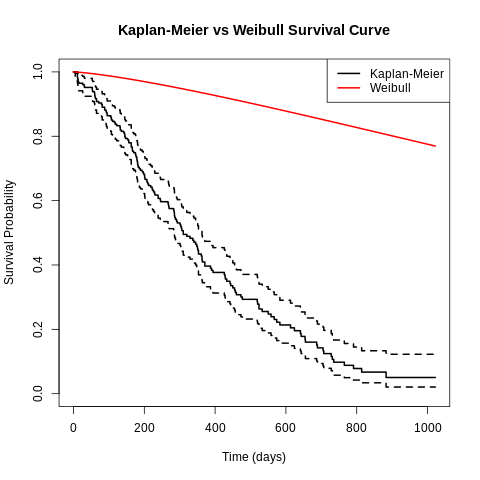

In [17]:
%%R
# Fit Kaplan-Meier for comparison
km_fit <- survfit(surv_object ~ 1)

# Plot KM curve
plot(km_fit, main = "Kaplan-Meier vs Weibull Survival Curve",
     xlab = "Time (days)", ylab = "Survival Probability",
     col = "black", lwd = 2)

# Add Weibull curve (null model)
t_seq <- seq(0, max(lung$time), length.out = 100)
lambda <- exp(-coef(weibull_model)[1] / weibull_model$scale)
p <- 1 / weibull_model$scale
surv_weibull <- exp(-(lambda * t_seq)^p)
lines(t_seq, surv_weibull, col = "red", lwd = 2)
legend("topright", c("Kaplan-Meier", "Weibull"), col = c("black", "red"), lwd = 2)


If the Weibull curve closely follows the Kaplan-Meier curve, the model fits well.


#### Hazard Plot


Plot the hazard function to visualize its shape.


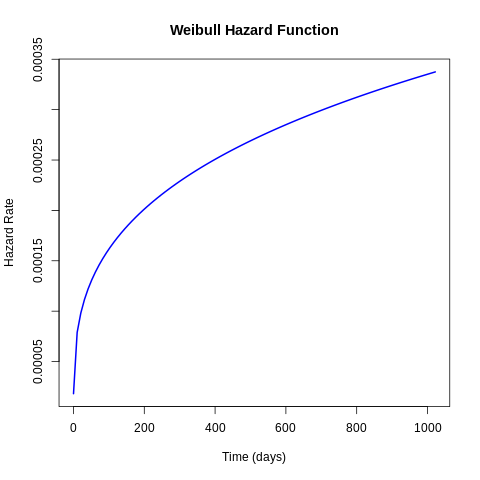

In [18]:
%%R
# Hazard function: h(t) = lambda * p * (lambda * t)^(p-1)
t_seq <- seq(0.1, max(lung$time), length.out = 100)
hazard <- lambda * p * (lambda * t_seq)^(p - 1)
plot(t_seq, hazard, type = "l", col = "blue", lwd = 2,
     main = "Weibull Hazard Function", xlab = "Time (days)", ylab = "Hazard Rate")

#### Diagnostic Plot


Check residuals to assess model fit.


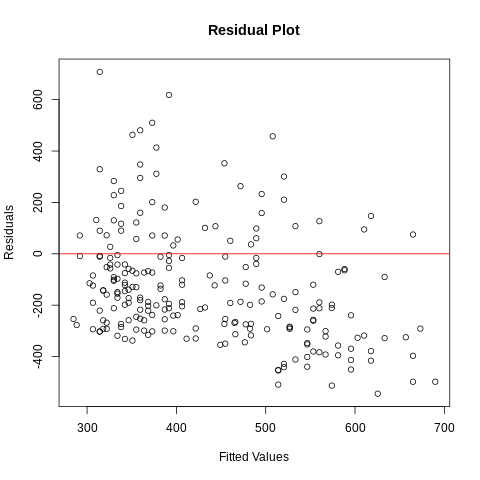

In [19]:
%%R
# Residual plot
plot(predict(weibull_model_cov, type = "response"), residuals(weibull_model_cov),
     xlab = "Fitted Values", ylab = "Residuals", main = "Residual Plot")
abline(h = 0, col = "red")

## Advanced Topics and Tips


- **Including More Covariates**: Add variables like `ph.ecog` (performance status) to the model.


In [20]:
%%R
  weibull_model_full <- survreg(Surv(time, status) ~ age + sex + ph.ecog, data = lung, dist = "weibull")
  summary(weibull_model_full)


Call:
survreg(formula = Surv(time, status) ~ age + sex + ph.ecog, data = lung, 
    dist = "weibull")
               Value Std. Error     z       p
(Intercept)  6.27344    0.45358 13.83 < 2e-16
age         -0.00748    0.00676 -1.11  0.2690
sex          0.40109    0.12373  3.24  0.0012
ph.ecog     -0.33964    0.08348 -4.07 4.7e-05
Log(scale)  -0.31319    0.06135 -5.11 3.3e-07

Scale= 0.731 

Weibull distribution
Loglik(model)= -1132.4   Loglik(intercept only)= -1147.4
	Chisq= 29.98 on 3 degrees of freedom, p= 1.4e-06 
Number of Newton-Raphson Iterations: 5 
n=227 (1 observation deleted due to missingness)





- **Alternative Packages**: The `flexsurv` package offers more flexibility for Weibull and other distributions, including proportional hazards parameterization.


In [21]:
%%R
#install.packages("flexsurv")
library(flexsurv)
flexsurv_model <- flexsurvreg(Surv(time, status) ~ age + sex, data = lung, dist = "weibull")
# summary(flexsurv_model)


- **Checking Assumptions**: Use cumulative hazard plots or log-log plots to check the Weibull assumption. For log-log:


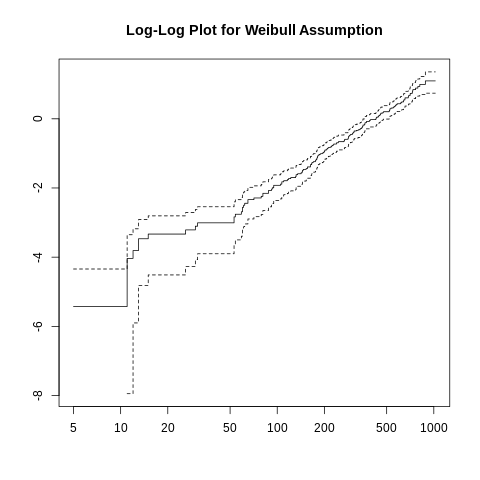

In [22]:
%%R
km_loglog <- survfit(surv_object ~ 1)
plot(km_loglog, fun = "cloglog", main = "Log-Log Plot for Weibull Assumption")


A straight line suggests Weibull is appropriate.

- **Limitations**: If hazards are non-monotonic, consider log-normal or log-logistic models. If the shape parameter is unstable, check data quality or try semi-parametric models (e.g., Cox).

- **Resources**: See the `survival` vignette (`vignette("survival")`) or "Applied Survival Analysis" by Hosmer and Lemeshow.



## Summary and Conclusion


The Weibull model is a powerful and flexible tool for survival analysis, capable of modeling various hazard shapes. This tutorial covered:
- Fitting Weibull models with and without covariates using `survreg()`.
- Interpreting model parameters, including the shape and scale.
- Making predictions for survival times and probabilities.
- Visualizing survival curves and hazard functions to assess model fit.
- Checking model assumptions and exploring advanced topics.

With practice, the Weibull model can provide valuable insights into time-to-event data across various fields, from medical research to engineering reliability. This tutorial serves as a foundation for applying and interpreting Weibull survival models in R.



## Resources


- **R Documentation**:
  - `survreg`: [https://rdrr.io/r/stats/survreg.html](https://rdrr.io/r/stats/survreg.html)
  - `flexsurvreg`: [https://cran.r-project.org/web/packages/flexsurv/flexsurv.pdf](https://cran.r-project.org/web/packages/flexsurv/flexsurv.pdf)
- **Books**:
  - "Survival Analysis: Techniques for Censored and Truncated Data" by Klein & Moeschberger
  - "Applied Survival Analysis" by Hosmer, Lemeshow, & May
- **Tutorials**:
  - UCLA IDRE Survival Analysis with R: [https://stats.idre.ucla.edu/r/seminars/survival-analysis-with-r/](https://stats.idre.ucla.edu/r/seminars/survival-analysis-with-r/)
  - R-bloggers: [https://www.r-bloggers.com/](https://www.r-bloggers.com/)
- **Online Courses**:
  - Coursera: "Survival Analysis in R" by Duke University
  - edX: "Survival Analysis" by Harvard University



In [ ]:
%%R
rm(list = ls())